In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 分布分析:
    研究数据的分布特征和分布类型, 定量数据 定性数据 区分基本统计量
    极差/频率分布/分组 组距 组数

In [2]:
data = pd.read_csv('./second_hand_ house.csv')

In [4]:
data.head()

房屋编码      小区  朝向   房屋单价  参考首付   参考总价          经度         纬度
0  605093949   大望新平村  南北   5434  15.0   50.0  114.180964  22.603698
1  605768856     通宝楼  南北   3472   7.5   25.0  114.179298  22.566910
2  606815561  罗湖区罗芳村  南北   5842  15.6   52.0  114.158869  22.547223
3  605147285     兴华苑  南北   3829  10.8   36.0  114.158040  22.554343
4  606030866  京基东方都会  西南  47222  51.0  170.0  114.149243  22.554370

In [5]:
def Range(df, *cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return krange

In [6]:
dr = Range(data, '参考首付', '参考总价')

In [7]:
dr

[52.5, 175.0]

In [8]:
data['参考首付'].max() - data['参考首付'].min()

52.5

In [9]:
key1 = '参考首付'
key2 = '参考总价'

<AxesSubplot:>

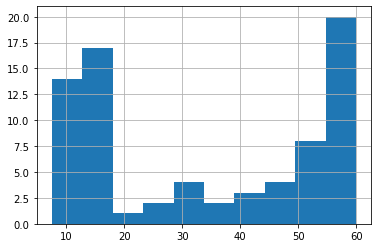

In [10]:
# 直方图直接判断分组组数
data[key1].hist(bins=10)  # 定量数据  8 - 16之间

In [15]:
# 分组区间  bins  
gcut = pd.cut(data[key2], 10, right=False)
gcut_count = gcut.value_counts(sort=False)
data['%s分组区间' % key2] = gcut.values

In [14]:
gcut_count

[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64

In [17]:
data

房屋编码      小区  朝向   房屋单价  参考首付   参考总价          经度         纬度  \
0   605093949   大望新平村  南北   5434  15.0   50.0  114.180964  22.603698   
1   605768856     通宝楼  南北   3472   7.5   25.0  114.179298  22.566910   
2   606815561  罗湖区罗芳村  南北   5842  15.6   52.0  114.158869  22.547223   
3   605147285     兴华苑  南北   3829  10.8   36.0  114.158040  22.554343   
4   606030866  京基东方都会  西南  47222  51.0  170.0  114.149243  22.554370   
..        ...     ...  ..    ...   ...    ...         ...        ...   
70  598258845    三九花园   南   5833  12.6   42.0  114.089539  22.577080   
71  594221866    三九花园   南   5681  15.0   50.0  114.089539  22.577080   
72  606700179    城市春天  南北   3571   7.5   25.0  114.083405  22.539505   
73  603950517     皇御苑  东北  59701  54.0  180.0  114.081795  22.531393   
74  605232094    晨晖家园   南  54285  57.0  190.0  114.067625  22.525508   

            参考总价分组区间  
0       [42.5, 60.0)  
1       [25.0, 42.5)  
2       [42.5, 60.0)  
3       [25.0, 42.5)  
4     [165.0, 182.5)  
..               ...  
70      [25.0, 42.5)  
71      [42.5, 60.0)  
72      [25.0, 42.5)  
73    [165.0, 182.5)  
74  [182.5, 200.175)  

[75 rows x 9 columns]

In [21]:
# 频数 频率 累计频率
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns={gcut_count.name:'频数'}, inplace=True)

In [32]:
# r_zj['频率'] = r_zj / r_zj['频数'].sum()
r_zj['累计频率'] = r_zj['频率'].cumsum()
r_zj['频率%'] = r_zj['频率'].apply(lambda x:'%.2f%%' % (x * 100))
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x:'%.2f%%' % (x * 100))

In [35]:
r_zj.style.bar(subset=['频率' ,'累计频率'], color='green', width=100)

In [34]:
r_zj

频数        频率      累计频率     频率%    累计频率%
[25.0, 42.5)      14  0.186667  0.186667  18.67%   18.67%
[42.5, 60.0)      17  0.226667  0.413333  22.67%   41.33%
[60.0, 77.5)       1  0.013333  0.426667   1.33%   42.67%
[77.5, 95.0)       2  0.026667  0.453333   2.67%   45.33%
[95.0, 112.5)      4  0.053333  0.506667   5.33%   50.67%
[112.5, 130.0)     2  0.026667  0.533333   2.67%   53.33%
[130.0, 147.5)     3  0.040000  0.573333   4.00%   57.33%
[147.5, 165.0)     4  0.053333  0.626667   5.33%   62.67%
[165.0, 182.5)     8  0.106667  0.733333  10.67%   73.33%
[182.5, 200.175)  20  0.266667  1.000000  26.67%  100.00%

Text(0.5, 1.0, '参考总价分布频率柱状图')

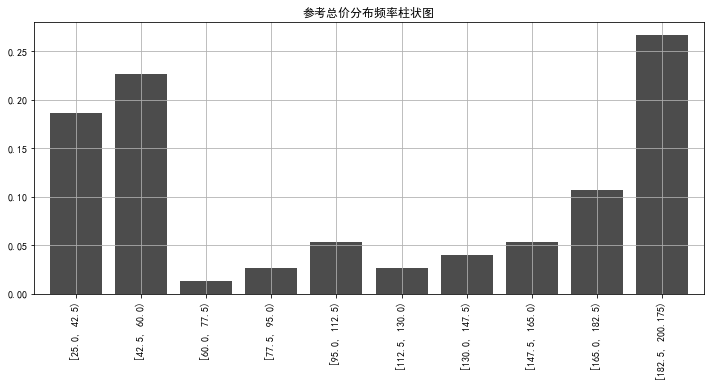

In [38]:
r_zj['频率'].plot(kind='bar', width=0.8, figsize=(12, 5), color='k', grid=True, alpha=0.7)
plt.title('参考总价分布频率柱状图')

In [39]:
plt.rcParams['font.family'] = ['simhei']

In [41]:
cx_g = data['朝向'].value_counts(sort=True)

In [42]:
cx_g

南北    29
南     20
东      8
东南     5
北      4
西南     4
西北     3
东西     1
东北     1
Name: 朝向, dtype: int64

### 对比分析:
    两个相互关联的指标进行比较
    绝对数比较(相减  相除) (数据不能相差过大)
    结构分析  比例分析 空间比较分析 动态对比分析

In [43]:
data = pd.DataFrame(np.random.rand(30, 2) * 1000, columns=['A', 'B'], index = pd.period_range('20210101', '20210130'))

In [44]:
data

A           B
2021-01-01  463.559921  679.357876
2021-01-02  150.092542  611.284291
2021-01-03  132.515288  450.667995
2021-01-04  409.606707  258.046664
2021-01-05  558.030179  785.101008
2021-01-06  224.888906  487.927550
2021-01-07  431.160011  818.255947
2021-01-08  764.889700   61.550837
2021-01-09  519.651259  410.166164
2021-01-10  204.186862  936.249915
2021-01-11  859.137331  277.933312
2021-01-12  389.695907  189.869024
2021-01-13   38.956866  923.427135
2021-01-14  240.814123  527.032442
2021-01-15   25.258779  773.323804
2021-01-16  839.170932  491.433426
2021-01-17   29.273397  261.845918
2021-01-18  970.408406  460.503402
2021-01-19  819.817440  826.538513
2021-01-20  730.722769   15.651343
2021-01-21  500.855282  313.953669
2021-01-22  286.267107  156.069193
2021-01-23  145.521282  441.756382
2021-01-24  757.251842  512.647554
2021-01-25  854.921028  276.979081
2021-01-26  892.468433  154.569364
2021-01-27  910.681420  515.343867
2021-01-28   60.784283  465.801708
2021-01-29  486.255895  616.782214
2021-01-30  181.262114  428.845460

<AxesSubplot:title={'center':'AB产品销售对比-折线图'}>

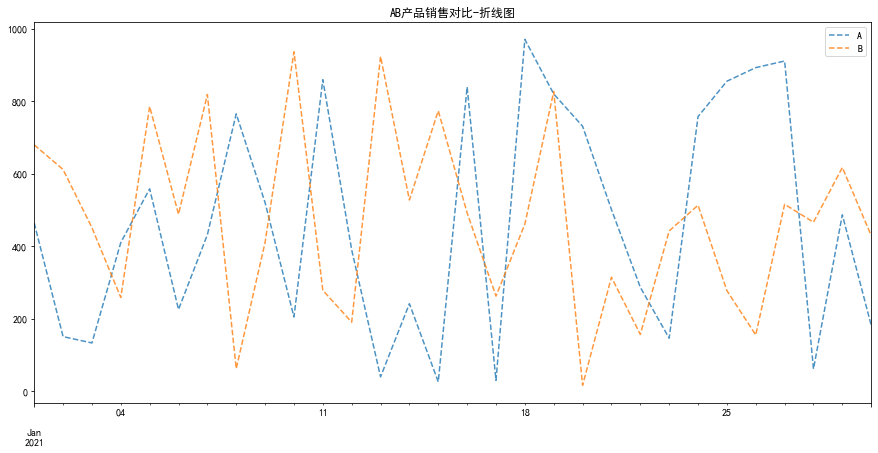

In [46]:
data.plot(kind='line', style='--', alpha=0.8, figsize=(15, 7), title='AB产品销售对比-折线图')

<AxesSubplot:>

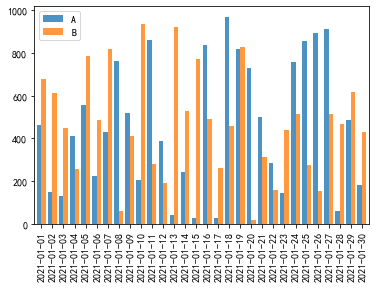

In [48]:
data.plot(kind='bar', width=0.8, alpha=0.8)

D:\ruanjian\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ruanjian\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


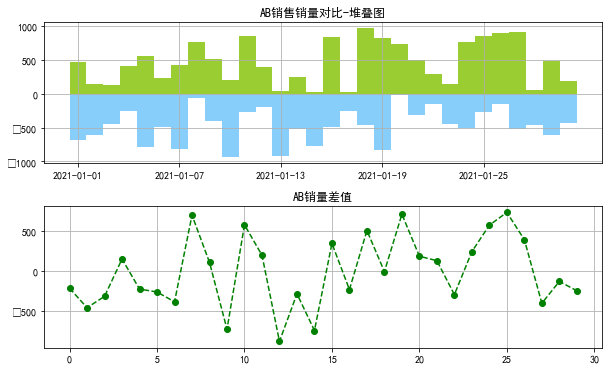

In [52]:
# 堆叠 + 差值折线
fig = plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2, 1, 1)
x = range(len(data))
y1 = data['A']
y2 = -data['B']
plt.bar(x, y1, width=1, facecolor='yellowgreen')
plt.bar(x, y2, width=1, facecolor='lightskyblue')
plt.title('AB销售销量对比-堆叠图')
plt.grid()
plt.xticks(range(0, 30, 6))
ax1.set_xticklabels(data.index[::6])


ax2 = fig.add_subplot(2, 1, 2)
y3 = data['A'] - data['B']
plt.plot(x, y3, '--go')
plt.grid()
plt.title('AB销量差值')
plt.show()

In [53]:
# 相对数比较 - 相除
#  有联系的指标综合计算后的对比 数值为相对数
# 结构分析 ->在分组基础上 各组总量直播与总体的总量指标对比, 计算各组在总量中占比的比重
# 本质: 反映总体的内部结构

In [56]:
data = pd.DataFrame({'A':np.random.rand(30) * 1000, 'B':np.random.rand(30) * 200}, index=pd.period_range('20210101', '20210130'))

In [57]:
data  # 不同量级

A           B
2021-01-01  634.409032   63.502800
2021-01-02  785.391860  146.644695
2021-01-03  419.346161   46.642875
2021-01-04  486.264956  175.487782
2021-01-05  640.314872  199.693635
2021-01-06   45.210654   23.091927
2021-01-07  744.259329   79.039999
2021-01-08  658.468615  102.931707
2021-01-09   76.948304  134.541495
2021-01-10   17.268453   72.836051
2021-01-11  238.535891  124.917332
2021-01-12  600.241421  161.102850
2021-01-13  239.843386   69.763791
2021-01-14  941.933508    3.757228
2021-01-15  563.841563  145.938578
2021-01-16  918.814457   59.454510
2021-01-17  865.558242  128.726948
2021-01-18   40.718819   97.175585
2021-01-19   76.081160  162.645068
2021-01-20  923.267708  125.678691
2021-01-21  854.369275   58.026410
2021-01-22  439.435548  122.047229
2021-01-23  493.650348   27.338542
2021-01-24  185.374008   25.590678
2021-01-25  180.642883  197.533872
2021-01-26  889.907308  105.932181
2021-01-27  478.162064  119.059228
2021-01-28  453.013268   26.838806
2021-01-29  622.506762   71.096540
2021-01-30  724.311799   41.526679

In [58]:
data['A_per'] = data['A'] / data['A'].sum()  #  每天的占比情况
data['B_per'] = data['B'] / data['B'].sum()

In [59]:
data['A_per%'] = data['A_per'].apply(lambda x:'%.2f%%' % (x * 100))
data['B_per%'] = data['B_per'].apply(lambda x:'%.2f%%' % (x * 100))

In [60]:
data

A           B     A_per     B_per A_per% B_per%
2021-01-01  634.409032   63.502800  0.041633  0.021758  4.16%  2.18%
2021-01-02  785.391860  146.644695  0.051541  0.050246  5.15%  5.02%
2021-01-03  419.346161   46.642875  0.027520  0.015981  2.75%  1.60%
2021-01-04  486.264956  175.487782  0.031911  0.060128  3.19%  6.01%
2021-01-05  640.314872  199.693635  0.042021  0.068422  4.20%  6.84%
2021-01-06   45.210654   23.091927  0.002967  0.007912  0.30%  0.79%
2021-01-07  744.259329   79.039999  0.048842  0.027082  4.88%  2.71%
2021-01-08  658.468615  102.931707  0.043212  0.035268  4.32%  3.53%
2021-01-09   76.948304  134.541495  0.005050  0.046099  0.50%  4.61%
2021-01-10   17.268453   72.836051  0.001133  0.024956  0.11%  2.50%
2021-01-11  238.535891  124.917332  0.015654  0.042801  1.57%  4.28%
2021-01-12  600.241421  161.102850  0.039391  0.055199  3.94%  5.52%
2021-01-13  239.843386   69.763791  0.015740  0.023903  1.57%  2.39%
2021-01-14  941.933508    3.757228  0.061814  0.001287  6.18%  0.13%
2021-01-15  563.841563  145.938578  0.037002  0.050004  3.70%  5.00%
2021-01-16  918.814457   59.454510  0.060297  0.020371  6.03%  2.04%
2021-01-17  865.558242  128.726948  0.056802  0.044106  5.68%  4.41%
2021-01-18   40.718819   97.175585  0.002672  0.033296  0.27%  3.33%
2021-01-19   76.081160  162.645068  0.004993  0.055728  0.50%  5.57%
2021-01-20  923.267708  125.678691  0.060589  0.043062  6.06%  4.31%
2021-01-21  854.369275   58.026410  0.056068  0.019882  5.61%  1.99%
2021-01-22  439.435548  122.047229  0.028838  0.041818  2.88%  4.18%
2021-01-23  493.650348   27.338542  0.032396  0.009367  3.24%  0.94%
2021-01-24  185.374008   25.590678  0.012165  0.008768  1.22%  0.88%
2021-01-25  180.642883  197.533872  0.011855  0.067682  1.19%  6.77%
2021-01-26  889.907308  105.932181  0.058400  0.036296  5.84%  3.63%
2021-01-27  478.162064  119.059228  0.031379  0.040794  3.14%  4.08%
2021-01-28  453.013268   26.838806  0.029729  0.009196  2.97%  0.92%
2021-01-29  622.506762   71.096540  0.040852  0.024360  4.09%  2.44%
2021-01-30  724.311799   41.526679  0.047533  0.014228  4.75%  1.42%

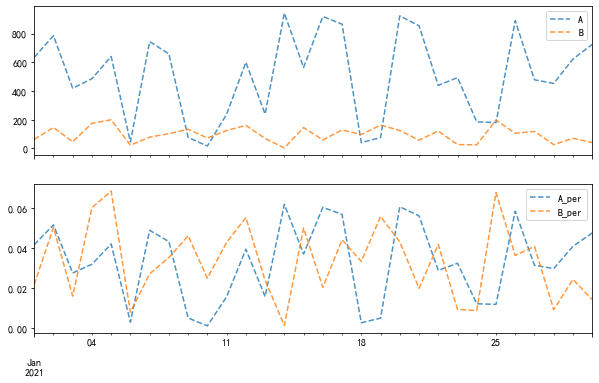

In [63]:
# 两个性质不同但有一定联系的总量指标对比, 说明 强度 密度 普遍程度
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
data[['A', 'B']].plot(kind='line', style='--', alpha=0.8, ax=axes[0])
axes[0].legend(loc='upper right')

data[['A_per', 'B_per']].plot(kind='line', style='--', alpha=0.8, ax=axes[1])
axes[1].legend(loc='upper right')
plt.show()

In [64]:
# 比例分析: 总体不同部位的指标进对比 其相对指标一般就是比例相对数
# 比例相对数 = 总体中某一部分的数值 / 总体中某一部分的数值
data = pd.DataFrame({'consumption':np.random.rand(12) * 1000 + 2000, 'salary':np.random.rand(12) * 500 + 5000}, index=pd.period_range('2021/1', '2021/12', freq='M'))

In [65]:
data

consumption       salary
2021-01  2538.309299  5024.568295
2021-02  2296.582188  5102.566219
2021-03  2891.974279  5359.241870
2021-04  2574.048853  5365.708433
2021-05  2248.818993  5086.848187
2021-06  2143.346350  5016.651881
2021-07  2375.475735  5221.724470
2021-08  2664.014636  5269.947579
2021-09  2589.233846  5380.653226
2021-10  2953.595860  5114.645071
2021-11  2861.067847  5100.078354
2021-12  2709.477628  5331.283037

In [66]:
data['c_s'] = data['consumption'] / data['salary']

<AxesSubplot:>

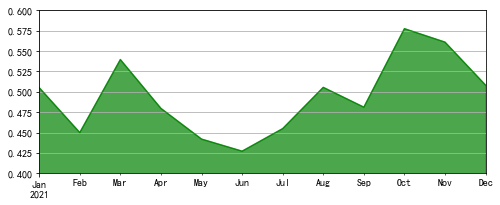

In [69]:
data['c_s'].plot.area(color='green', alpha=0.7, ylim=[0.4, 0.6], figsize=(8, 3), grid=True)

In [68]:
data.describe()

consumption       salary        c_s
count    12.000000    12.000000  12.000000
mean   2570.495460  5197.826385   0.494356
std     263.370069   138.811610   0.047644
min    2143.346350  5016.651881   0.427246
25%    2355.752348  5096.770812   0.453712
50%    2581.641350  5168.184770   0.493196
75%    2747.375183  5338.272745   0.516073
max    2953.595860  5380.653226   0.577478

In [70]:
# 相对数比较 - 相除
# 空间比较分析(横向对比分析)
# 同类现象在同一个时间不同空间的指标数值进行对比
# 本质:反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
# 空间比例相对数 = 甲空间某一个现象的数值 / 乙空间同类现象的数值

data = pd.DataFrame({'A':np.random.rand(30) * 5000,
                    'B':np.random.rand(30) * 2000,
                    'C':np.random.rand(30) * 10000,
                    'D':np.random.rand(30) * 800},
                   index=pd.period_range('20210101', '20210130'))



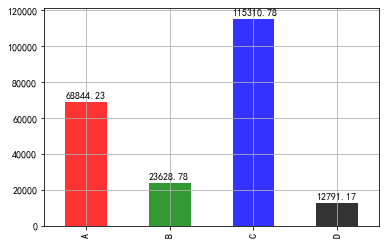

In [76]:
data.sum().plot(kind='bar', color=['r', 'g', 'b', 'k'], alpha=0.8, grid=True)
for i, j in zip(range(4), data.sum()):
    plt.text(i-0.25, j+2000, '%.2f' % j, color='k')

<AxesSubplot:>

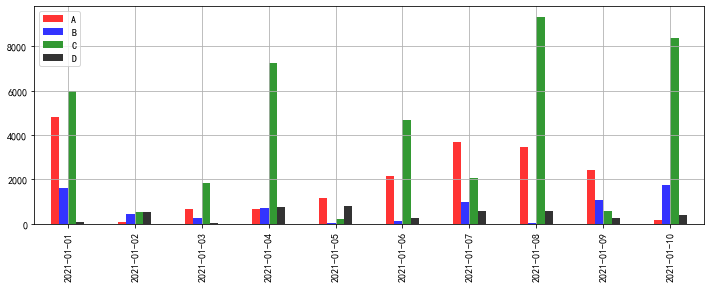

In [77]:
data[:10].plot(kind='bar', color=list('rbgk'), alpha=0.8, grid=True, figsize=(12, 4))

In [78]:
# 同比: A 在2021.3 和在2022.3 比较 (相邻时间段的同一个时间点)
# 环比: A 2021.3 2022.4 比较 (相邻时间段的比较)
# 如何界定"相邻时间段"与"时间点" 决定了是同比还是环比

In [79]:
# 相对数比较 - 相除
# 动态对比分析(纵向对比分析)
# 同一现象在不同时间上的指标数值进行比较
# 本质: 反应现象的数据随着时间推移而发展变动程度以及趋势
# 最基本方法, 计算动态相对数 - >发展速度
# 动态相对数 =  某一个现象的报告期数值 / 同一个现象基期 数值
# 基期: 用来比较的基础时期
# 报告期: 研究的时期  计算期

In [80]:
data = pd.DataFrame({'A':np.random.rand(30) * 2000 + 1000},
                   index=pd.period_range('20210601', '20210630'))

In [82]:
data.describe()

A
count    30.000000
mean   2095.393674
std     576.372433
min    1225.866323
25%    1693.568199
50%    2167.587177
75%    2539.606868
max    2900.865272

In [83]:
data['base'] = 2000 # 平均 假设基期
data['累计增长量=报告期水平-固定基期水平'] = data['A'] - data['base']

In [86]:
data['琢期增长量=报告期水平-报告期前一期水平'] = data['A'] - data.shift(1)['A']

In [88]:
data[data.isnull()] = 0

In [90]:
data.head()

A  base  累计增长量=报告期水平-固定基期水平  琢期增长量=报告期水平-报告期前一期水平
2021-06-01  2878.854955  2000          878.854955              0.000000
2021-06-02  2630.487379  2000          630.487379           -248.367576
2021-06-03  1879.958916  2000         -120.041084           -750.528463
2021-06-04  1272.330341  2000         -727.669659           -607.628575
2021-06-05  2142.056650  2000          142.056650            869.726309

D:\ruanjian\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ruanjian\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


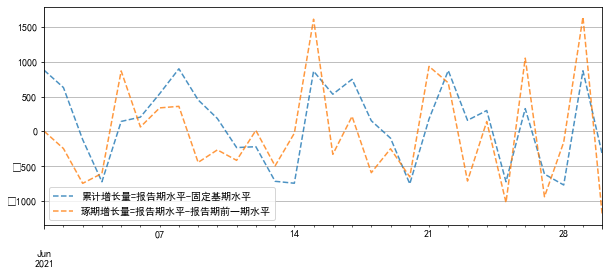

In [93]:
data[['累计增长量=报告期水平-固定基期水平', '琢期增长量=报告期水平-报告期前一期水平']].plot(figsize=(10, 4), style='--', alpha=0.8)
plt.legend(loc='lower left')
plt.grid()

data['定基增长速度'] = data['累计增长量=报告期水平-固定基期水平'] / data['base']
data['环比增长速度'] = data['琢期增长量=报告期水平-报告期前一期水平'] / data.shift(1)['A']

D:\ruanjian\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ruanjian\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


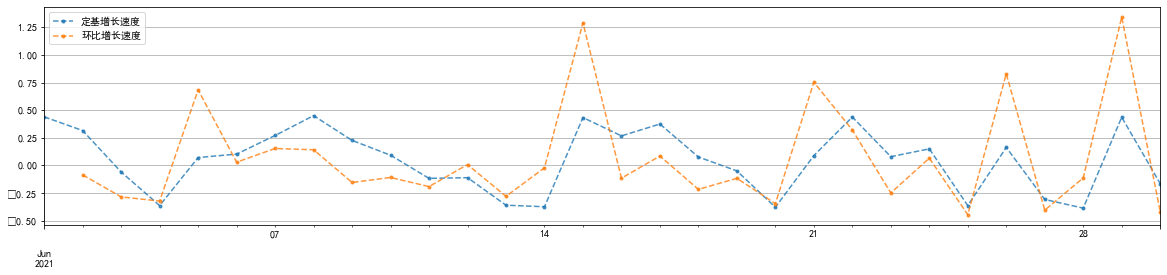

In [95]:
data[['定基增长速度', '环比增长速度']].plot(figsize=(20, 4), style='--.', alpha=0.8)
plt.grid()